In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import os

In [2]:
#load dataset and take a quick look at data statistics
# Load dataset
CSV_FILE_PATH = "/Users/pritpatel/Documents/End to End Machine Learning project./CaliforniaHousing/housing.csv"
if os.path.exists(CSV_FILE_PATH):
    data = pd.read_csv(CSV_FILE_PATH)
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:", data.head())
else:
    print(f"File not found: {CSV_FILE_PATH}")
    data = pd.DataFrame()  # Empty DataFrame as fallback
pd.set_option('display.max_columns', None) # Adjust the width as needed

Dataset loaded successfully.
First 5 rows of the dataset:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
# get insights of the data 
# 1. info() gives you data types and tells you where the nulls (missing values) are
print("\n----------- DATA INFO -----------")
print(data.info())

# 2. describe() gives you the math (mean, min, max, std) for the numbers
print("\n----------- STATISTICAL SUMMARY -----------")
print(data.describe())

# 3. Only look at value_counts for the CATEGORICAL column (ocean_proximity)
print("\n----------- OCEAN PROXIMITY COUNTS -----------")
print(data["ocean_proximity"].value_counts())


----------- DATA INFO -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

----------- STATISTICAL SUMMARY -----------
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     

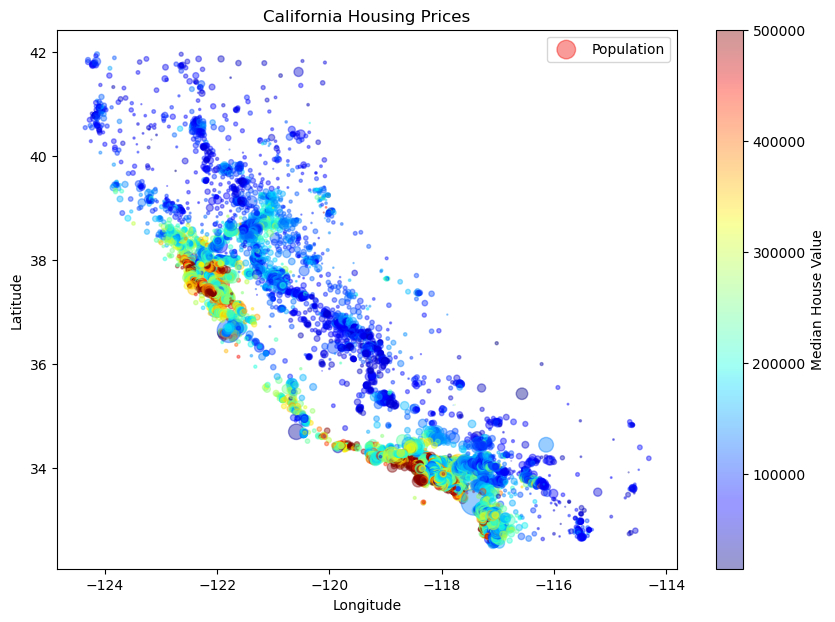

In [4]:
## Scatter plot of latitude vs longitude, colored by median house value
plt.figure(figsize=(10, 7))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            s=data['population']/100, c=data['median_house_value'], cmap='jet', label='Population')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.legend()
plt.show()

<Figure size 1000x700 with 0 Axes>

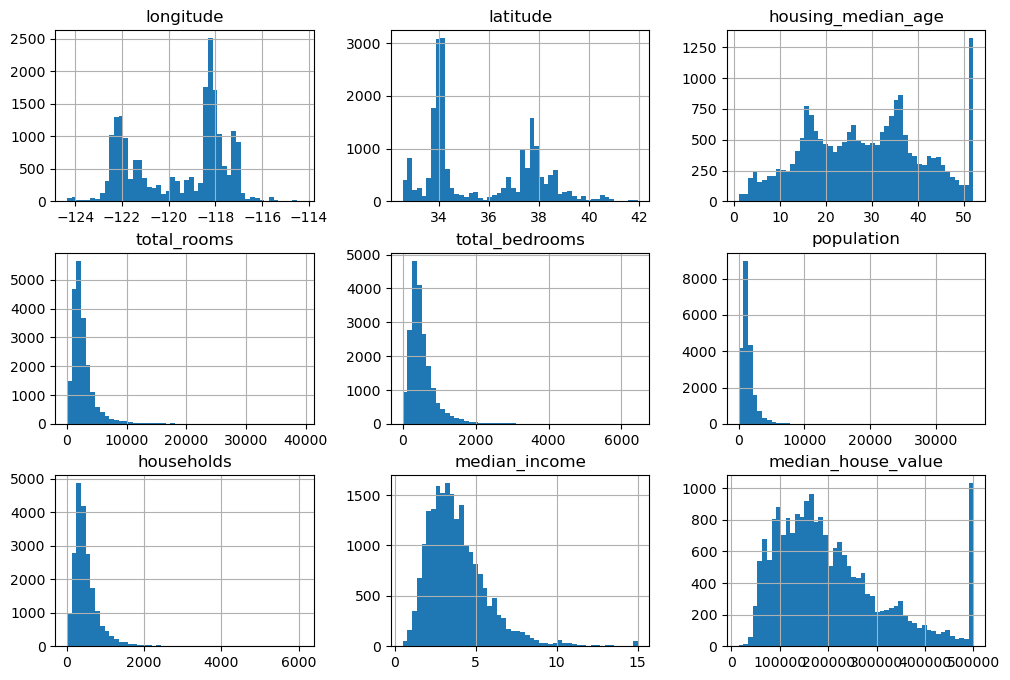

In [5]:
## Histogram of all numerical attributes
plt.figure(figsize=(10, 7))
data.hist(bins=50, figsize=(12, 8))
plt.show()

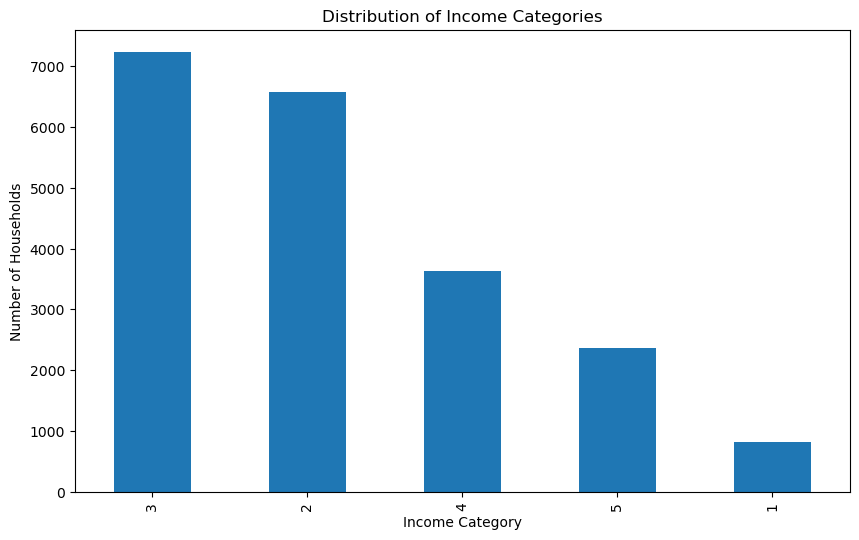

In [6]:
data["income_cat"]= pd.cut(data["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

data['income_cat'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Income Category')
plt.ylabel('Number of Households')
plt.title('Distribution of Income Categories')
plt.show()

In [7]:
# Split the data into training and testing sets based on income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split=[]
for train_index, test_index in split.split(data, data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    strat_split.append((strat_train_set, strat_test_set))

strat_train_set, strat_test_set = strat_split[0]

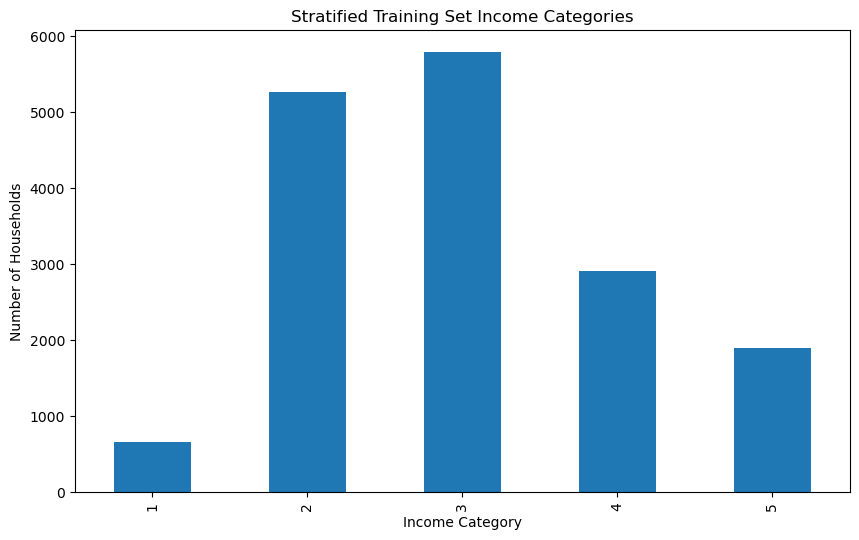

In [8]:
strat_train_set.value_counts('income_cat').sort_index().plot(kind='bar', figsize=(10,6))
plt.xlabel('Income Category')
plt.ylabel('Number of Households')
plt.title('Stratified Training Set Income Categories')
plt.show()

In [9]:
print("values count of train set", strat_train_set['income_cat'].value_counts())
print("values count of test set", strat_test_set['income_cat'].value_counts())

strat_train_set.info()
strat_test_set.info()

strat_train_set['income_cat'].head()

values count of train set income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64
values count of test set income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(

12655    2
15502    5
2908     2
14053    2
20496    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [10]:
strat_train_set['income_cat'].head()

12655    2
15502    5
2908     2
14053    2
20496    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [11]:
strat_test_set['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
# Remove income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)



In [14]:
#original state
strat_train_set.info()
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64


In [15]:
#explore and visualize data to get better understanding of data relationships
data = strat_train_set.copy()

In [16]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,165700.0,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,349600.0,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


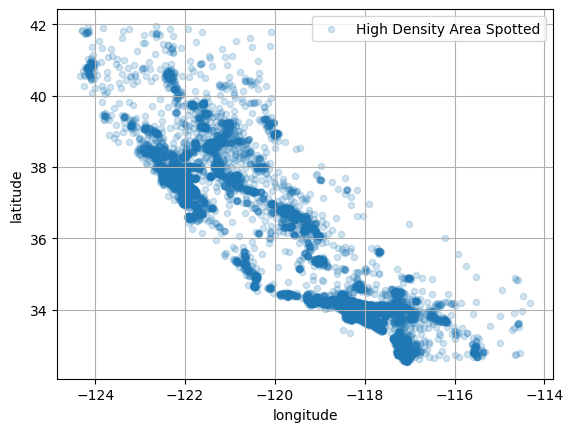

In [17]:
data.plot(kind= 'scatter', x='longitude', y='latitude', grid=True, alpha=0.2, label="High Density Area Spotted")
plt.show()

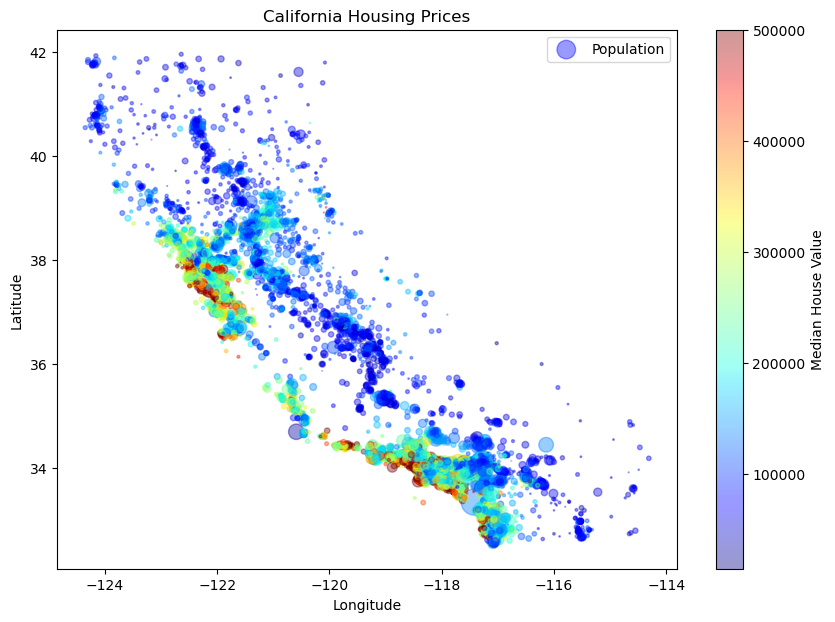

In [18]:
# california housing price, red = high price, blue = low price price
plt.figure(figsize=(10, 7))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            s=data['population']/100, c=data['median_house_value'], cmap='jet', label='Population')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.legend()
plt.show()

In [19]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [21]:
# Looking for correlations
corr_matrix = data.corr(numeric_only=True)

In [22]:
print("\n----------- CORRELATION MATRIX -----------")
print(corr_matrix["median_house_value"].sort_values(ascending=False))


----------- CORRELATION MATRIX -----------
median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


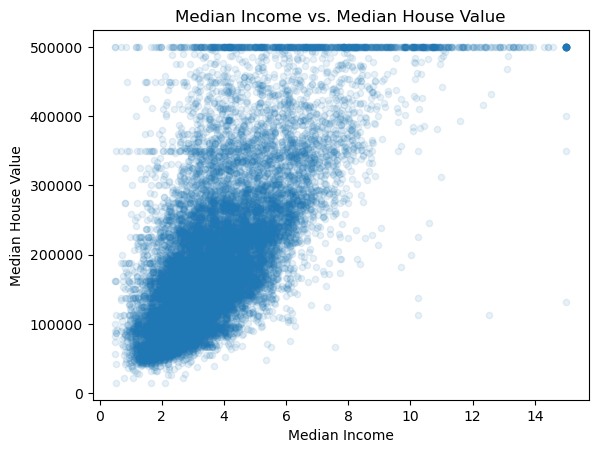

In [23]:
# Scatter plot to visualize correlation between median_income and median_house_value
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()


In [24]:
# Prepare the data for machine learning algorithms
data = strat_train_set.drop("median_house_value", axis=1)
data_labels = strat_train_set["median_house_value"].copy()
print("\n----------- DATA PREPARATION -----------")
print("Data prepared for machine learning algorithms.")
data.info()
data_labels.info()


----------- DATA PREPARATION -----------
Data prepared for machine learning algorithms.
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.series.Series'>
Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258

In [25]:
#in this module book gave me inportant advise. I should create a function to do all the preprocessing steps. 
#This is important because when I will be using the model to make predictions on new data, I will need to apply the same preprocessing steps to the new data. 
#By creating a function, I can ensure that the same steps are applied consistently.

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(data):
    # preprocessing the data usibg imputation and scaling
    imputer = SimpleImputer(strategy="median")
    data_num = data.drop("ocean_proximity", axis=1)
    imputer.fit(data_num)
    X = imputer.transform(data_num)
    data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

    # #using onehotencoder to build a pipeline for preprocessing the data
    cat_encoder = OneHotEncoder()
    data_cat_1hot = cat_encoder.fit_transform(data[["ocean_proximity"]])
    
    # Feature scaling
    scaler = StandardScaler()
    data_tr_scaled = scaler.fit_transform(data_tr)
    data_tr_scaled = pd.DataFrame(data_tr_scaled, columns=data_tr.columns, index=data_tr.index)

    return data_tr_scaled, data_cat_1hot

In [27]:
print("\n----------- PREPROCESSING DATA -----------", "\n")
data_tr_scaled, data_cat_1hot = preprocess_data(data)
print("Preprocessed numerical data shape:", data_tr_scaled.shape)
print("Preprocessed categorical data shape:", data_cat_1hot.shape)


----------- PREPROCESSING DATA ----------- 

Preprocessed numerical data shape: (16512, 8)
Preprocessed categorical data shape: (16512, 5)


In [37]:
data.info()
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.series.Series'>
Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [38]:
#lets use columntransformer to combine the numerical and categorical data into one dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the column transformer to apply the appropriate transformations to numerical and categorical features
num_attribs = data.drop("ocean_proximity", axis=1).columns
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])  

# Apply the full pipeline to the training data
data_prepared = full_pipeline.fit_transform(data)
print("\n----------- FULL PIPELINE PREPARATION -----------", "\n")
print("Preprocessed data shape after full pipeline:", data_prepared.shape)



----------- FULL PIPELINE PREPARATION ----------- 

Preprocessed data shape after full pipeline: (16512, 13)


In [42]:
data_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 13))